In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [84]:
df=pd.read_csv("Temparature_Forcast.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [16]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Checking Null Values

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

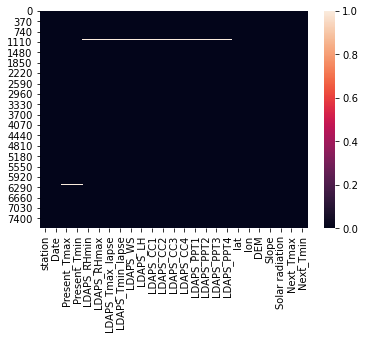

In [6]:
sn.heatmap(df.isnull())

In [10]:
df.loc[df['Next_Tmax']== " "]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [11]:
df.loc[df['Next_Tmin']== " "]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Visualization

23.0    307
18.0    307
10.0    307
17.0    307
25.0    307
2.0     307
3.0     306
4.0     306
13.0    305
20.0    304
16.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
24.0    302
22.0    302
19.0    302
9.0     302
11.0    301
6.0     301
7.0     301
8.0     300
5.0     296
Name: station, dtype: int64


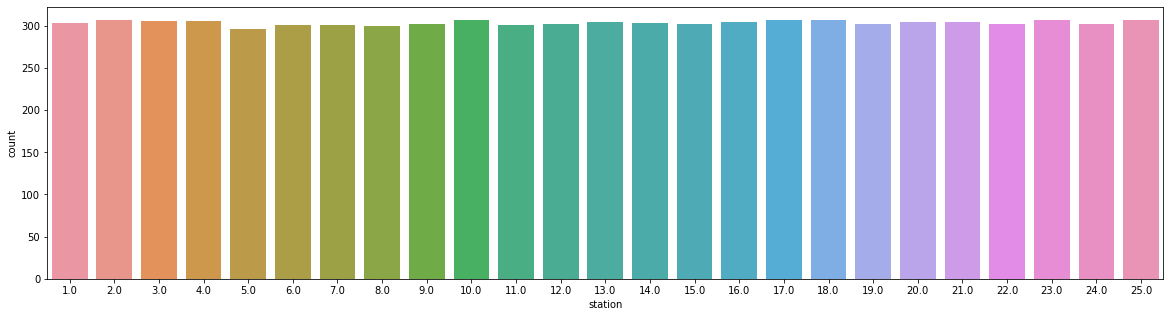

In [14]:
plt.figure(figsize = (20,5))
ax = sn.countplot(x="station", data=df)
print(df["station"].value_counts())

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

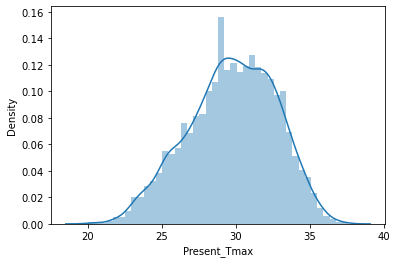

In [15]:
sn.distplot(df['Present_Tmax'], kde=True)

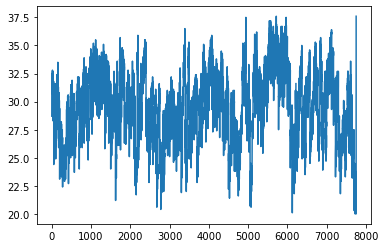

In [88]:
df['Present_Tmax'].plot()
plt.show()

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

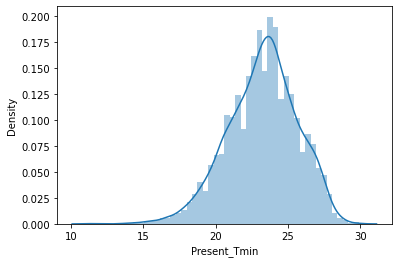

In [89]:
sn.distplot(df['Present_Tmin'], kde=True)

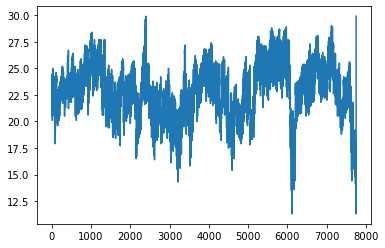

In [90]:
df['Present_Tmin'].plot()
plt.show()

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

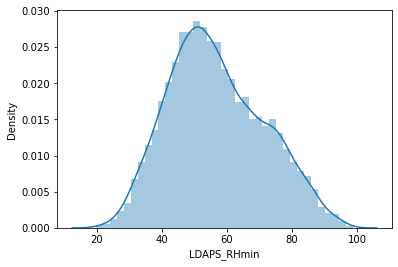

In [17]:
sn.distplot(df['LDAPS_RHmin'], kde=True)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

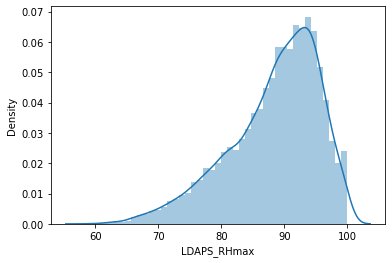

In [18]:
sn.distplot(df['LDAPS_RHmax'], kde=True)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

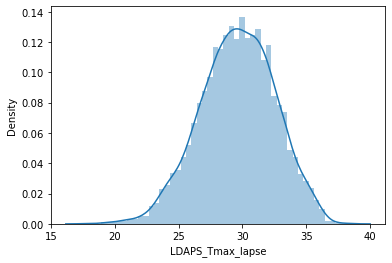

In [19]:
sn.distplot(df['LDAPS_Tmax_lapse'], kde=True)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

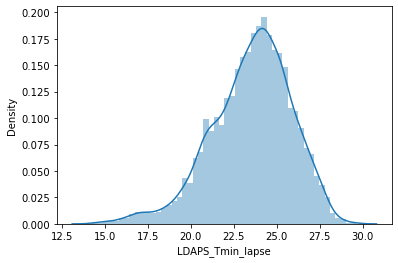

In [20]:
sn.distplot(df['LDAPS_Tmin_lapse'], kde=True)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

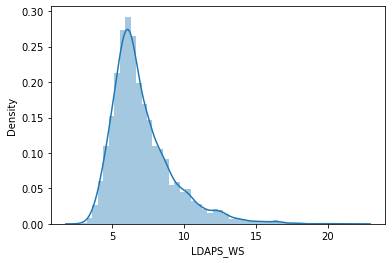

In [21]:
sn.distplot(df['LDAPS_WS'], kde=True)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

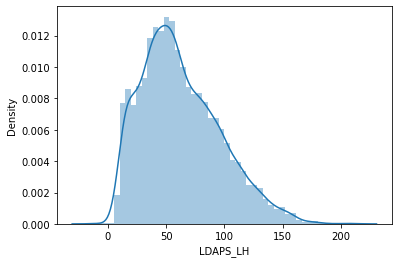

In [22]:
sn.distplot(df['LDAPS_LH'], kde=True)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

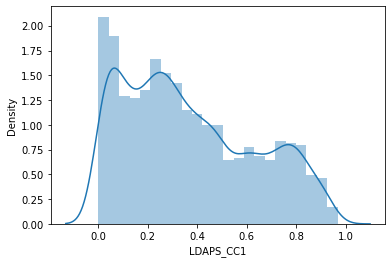

In [23]:
sn.distplot(df['LDAPS_CC1'], kde=True)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

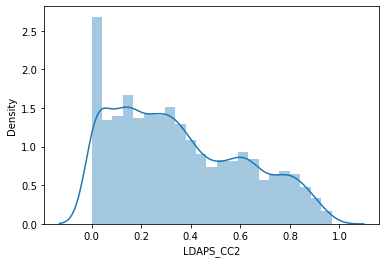

In [24]:
sn.distplot(df['LDAPS_CC2'], kde=True)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

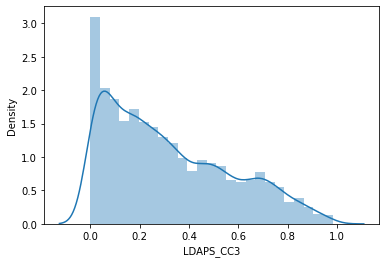

In [25]:
sn.distplot(df['LDAPS_CC3'], kde=True)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

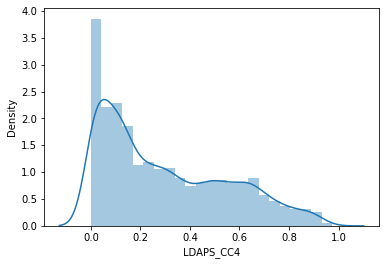

In [26]:
sn.distplot(df['LDAPS_CC4'], kde=True)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

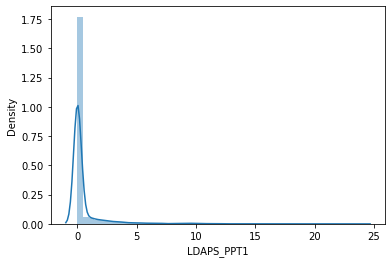

In [27]:
sn.distplot(df['LDAPS_PPT1'], kde=True)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

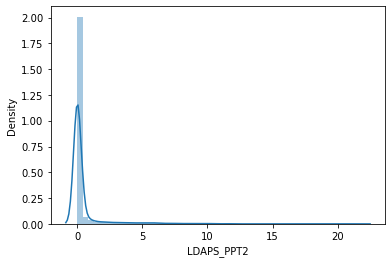

In [28]:
sn.distplot(df['LDAPS_PPT2'], kde=True)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

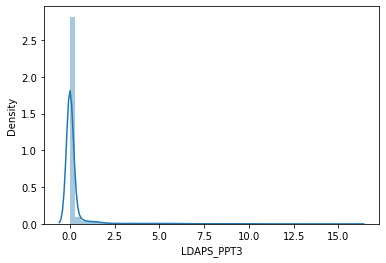

In [29]:
sn.distplot(df['LDAPS_PPT3'], kde=True)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

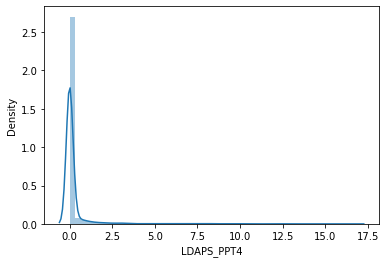

In [30]:
sn.distplot(df['LDAPS_PPT4'], kde=True)

37.5776    1214
37.5507    1204
37.6181     611
37.6046     610
37.5237     609
37.5372     608
37.4967     605
37.4697     604
37.5102     603
37.4562     307
37.4832     307
37.6450     306
Name: lat, dtype: int64


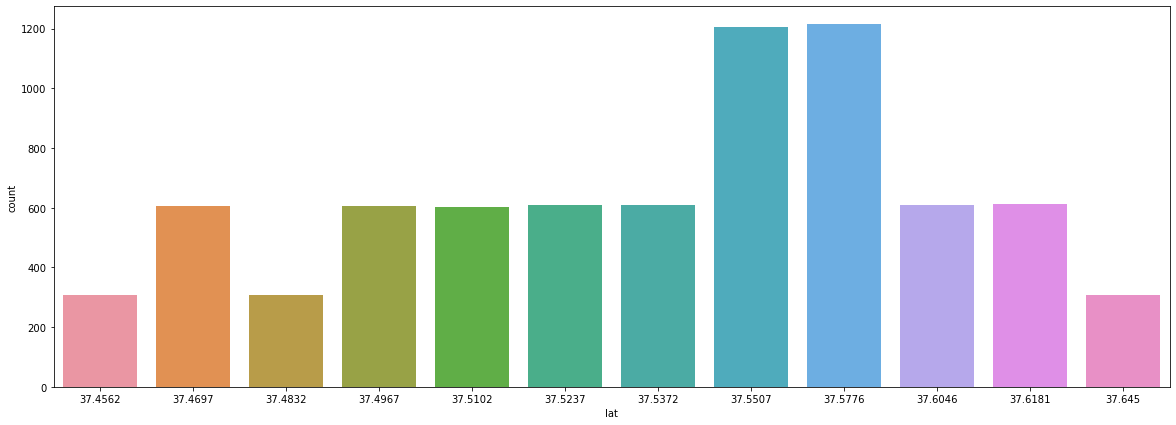

In [31]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="lat", data=df)
print(df["lat"].value_counts())

126.970    307
127.099    307
126.955    307
127.024    307
126.891    307
127.032    307
127.022    306
127.058    306
127.083    305
127.040    304
126.995    304
127.004    304
126.927    303
126.991    303
126.826    302
126.937    302
126.938    302
126.988    302
126.909    302
127.086    302
127.085    301
126.838    301
127.042    301
126.910    300
127.135    296
Name: lon, dtype: int64


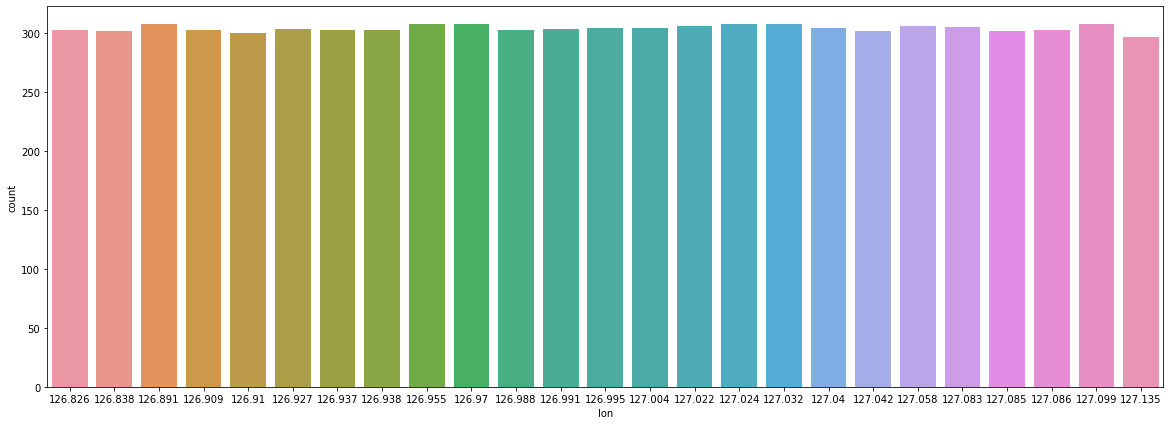

In [32]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="lon", data=df)
print(df["lon"].value_counts())

15.5876     307
56.4448     307
19.5844     307
44.7624     307
53.4712     307
208.5070    307
45.7160     306
33.3068     306
59.8324     305
146.5540    304
26.2980     304
82.2912     304
30.9680     303
212.3350    303
17.2956     302
30.0464     302
132.1180    302
50.9312     302
75.0924     302
21.9668     302
54.6384     301
12.3700     301
28.7000     301
52.5180     300
35.0380     296
Name: DEM, dtype: int64


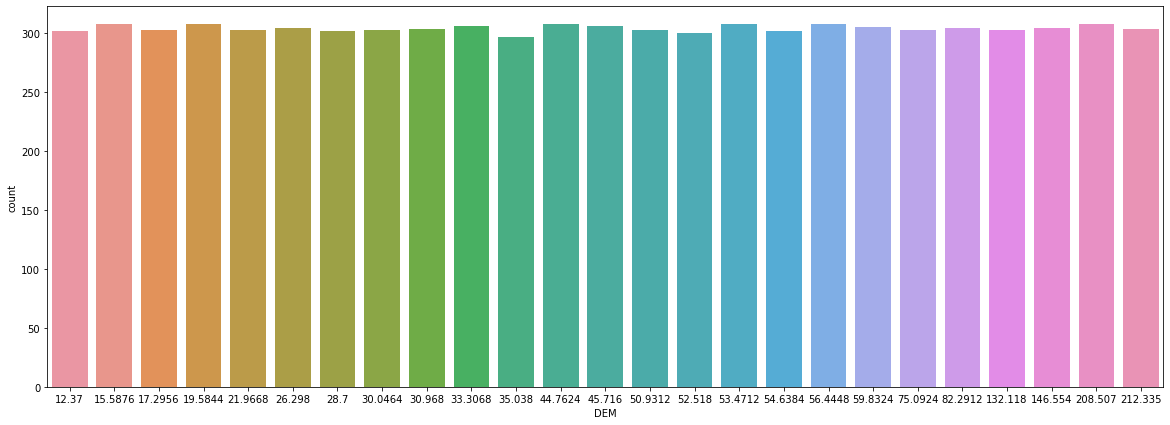

In [33]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="DEM", data=df)
print(df["DEM"].value_counts())

0.5141    307
0.6970    307
1.2313    307
0.2713    307
5.1782    307
0.1554    307
0.2661    306
2.5348    306
2.6865    305
2.2579    304
0.5721    304
4.7296    304
0.6180    303
2.7850    303
0.8552    302
0.4125    302
0.1332    302
1.7678    302
0.2223    302
0.5931    302
0.0985    301
0.1457    301
0.6233    301
1.5629    300
0.5055    296
Name: Slope, dtype: int64


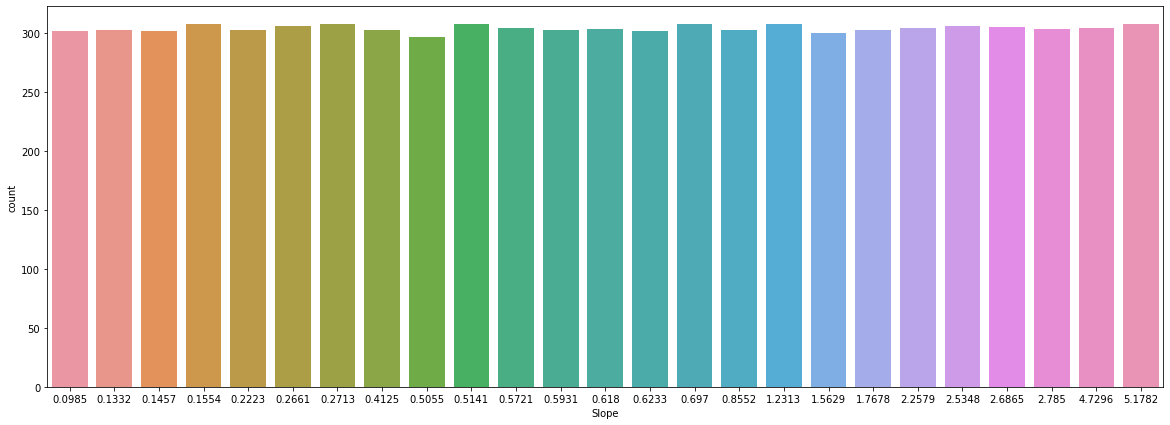

In [34]:
plt.figure(figsize=(20,7))
ax = sn.countplot(x="Slope", data=df)
print(df["Slope"].value_counts())

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

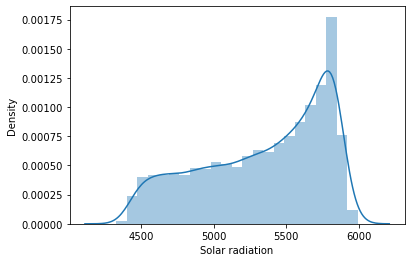

In [35]:
sn.distplot(df['Solar radiation'], kde=True)

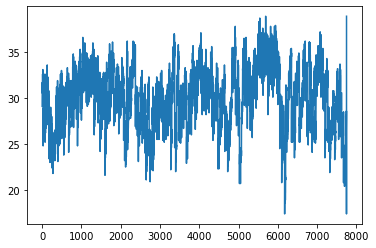

In [87]:
df['Next_Tmax'].plot()
plt.show()

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

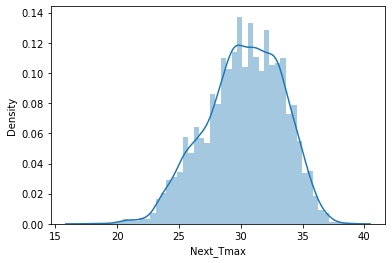

In [36]:
sn.distplot(df['Next_Tmax'], kde=True)

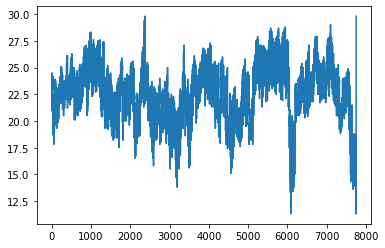

In [85]:
df['Next_Tmin'].plot()
plt.show()

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

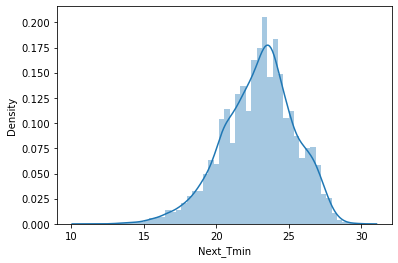

In [37]:
sn.distplot(df['Next_Tmin'], kde=True)

# Encoding Data

In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Date']=lb.fit_transform(df['Date'])

In [20]:
df.dtypes

station             float64
Date                  int32
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [21]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,152.971402,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,88.582041,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,76.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,153.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,230.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,306.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [41]:
df.corr()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,-0.000715,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Date,-0.000715,1.000000,-0.146420,-0.111763,-0.067340,-0.020293,-0.156538,-0.171036,-0.045460,-0.016545,...,-0.007390,0.004374,-0.033346,0.000845,-0.002540,0.000964,0.000650,-0.440027,-0.122771,-0.133439
Present_Tmax,0.113301,-0.146420,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,-0.111763,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.067340,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.020293,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,-0.156538,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,-0.171036,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.045460,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,-0.016545,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392


<AxesSubplot:>

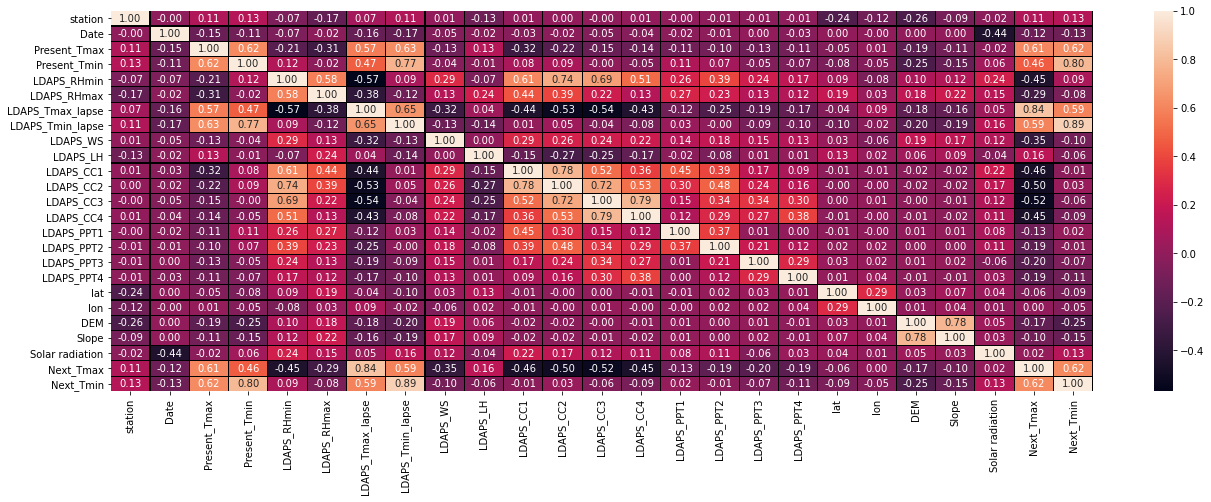

In [42]:
plt.figure(figsize=(22,7))
sn.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

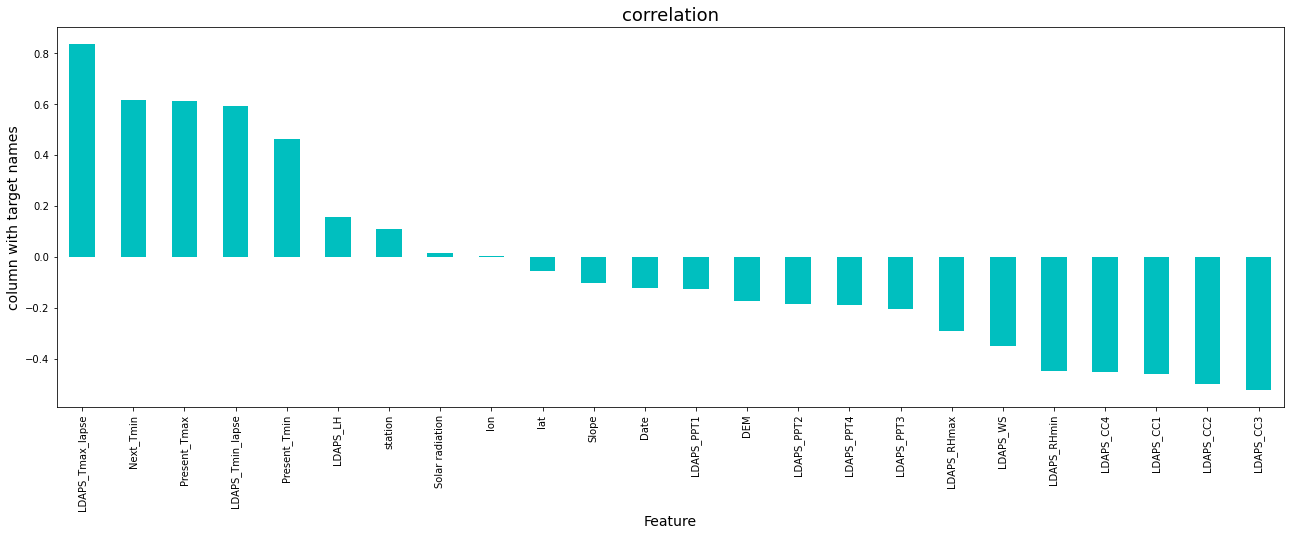

In [43]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

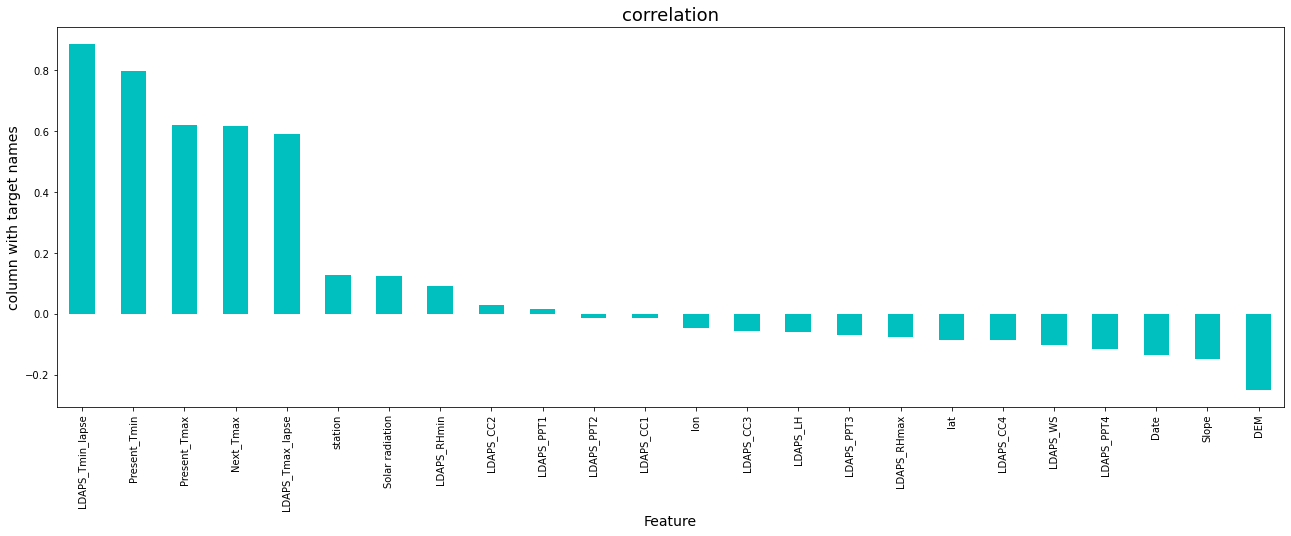

In [44]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Outlier treating

station                AxesSubplot(0.125,0.657941;0.0731132x0.222059)
Date                AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
Present_Tmax        AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Present_Tmin        AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
LDAPS_RHmin         AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
LDAPS_RHmax         AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
LDAPS_Tmax_lapse    AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
LDAPS_Tmin_lapse    AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
LDAPS_WS            AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
LDAPS_LH               AxesSubplot(0.125,0.391471;0.0731132x0.222059)
LDAPS_CC1           AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
LDAPS_CC2           AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
LDAPS_CC3           AxesSubplot(0.388208,0.391471;0.0731132x0.222059)
LDAPS_CC4           AxesSubplot(0.475943,0.391471;0.0731132x0.222059)
LDAPS_PPT1          

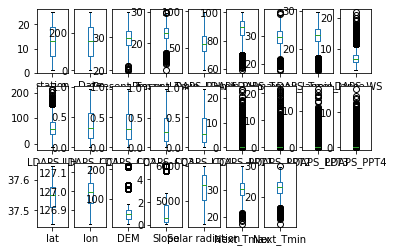

In [22]:
df.plot(kind='box',subplots=True,layout=(3,9))

In [23]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))

In [24]:
df1=df[(z<3).all(axis=1)]
df1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,288,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,288,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,288,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,288,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,288,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,302,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,302,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,302,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,302,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [11]:
df1.skew()

station            NaN
Date               NaN
Present_Tmax       NaN
Present_Tmin       NaN
LDAPS_RHmin        NaN
LDAPS_RHmax        NaN
LDAPS_Tmax_lapse   NaN
LDAPS_Tmin_lapse   NaN
LDAPS_WS           NaN
LDAPS_LH           NaN
LDAPS_CC1          NaN
LDAPS_CC2          NaN
LDAPS_CC3          NaN
LDAPS_CC4          NaN
LDAPS_PPT1         NaN
LDAPS_PPT2         NaN
LDAPS_PPT3         NaN
LDAPS_PPT4         NaN
lat                NaN
lon                NaN
DEM                NaN
Slope              NaN
Solar radiation    NaN
Next_Tmax          NaN
Next_Tmin          NaN
dtype: float64

In [25]:
x=df1.iloc[:,0:23]
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,288,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,288,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,288,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,288,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,288,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [26]:
y=df1.iloc[:,-1]
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [27]:
x1=df1.iloc[:,0:23]
x1.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,288,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,288,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,288,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,288,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,288,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [28]:
y1=df1.iloc[:,-2]
y1.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-1.67271855,  1.53715778, -0.42570408, ...,  2.82873603,
         1.14315312,  1.54306808],
       [-1.5339585 ,  1.53715778,  0.69021541, ..., -0.30440591,
        -0.53650916,  1.24950169],
       [-1.39519845,  1.53715778,  0.58559796, ..., -0.5185938 ,
        -0.71994139,  1.23582661],
       ...,
       [ 1.38000259,  1.69571727, -2.30881822, ..., -0.8498936 ,
        -0.80182021, -2.13788629],
       [ 1.51876264,  1.69571727, -2.30881822, ..., -0.81795874,
        -0.75233789, -2.14962204],
       [ 1.65752269,  1.69571727, -2.3436907 , ..., -0.77516454,
        -0.71609523, -2.11880846]])

In [30]:
scale=StandardScaler()
x1=scale.fit_transform(x)
x1

array([[-1.67271855,  1.53715778, -0.42570408, ...,  2.82873603,
         1.14315312,  1.54306808],
       [-1.5339585 ,  1.53715778,  0.69021541, ..., -0.30440591,
        -0.53650916,  1.24950169],
       [-1.39519845,  1.53715778,  0.58559796, ..., -0.5185938 ,
        -0.71994139,  1.23582661],
       ...,
       [ 1.38000259,  1.69571727, -2.30881822, ..., -0.8498936 ,
        -0.80182021, -2.13788629],
       [ 1.51876264,  1.69571727, -2.30881822, ..., -0.81795874,
        -0.75233789, -2.14962204],
       [ 1.65752269,  1.69571727, -2.3436907 , ..., -0.77516454,
        -0.71609523, -2.11880846]])

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
lr=LinearRegression()

In [33]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.8267322899851817
At random state 0,the testing accuracy is:- 0.8134023469563318


At random state 1,the training accuracy is:- 0.8288743431088272
At random state 1,the testing accuracy is:- 0.803077617333354


At random state 2,the training accuracy is:- 0.8211628296357417
At random state 2,the testing accuracy is:- 0.8358549253739067


At random state 3,the training accuracy is:- 0.8253749941905102
At random state 3,the testing accuracy is:- 0.8183996298727114


At random state 4,the training accuracy is:- 0.8271947642495712
At random state 4,the testing accuracy is:- 0.8111059921704998


At random state 5,the training accuracy is:- 0.8249334042454707
At random state 5,the testing accuracy is:- 0.8207656854213303


At random state 6,the training accuracy is:- 0.823804759701922
At random state 6,the testing accuracy is:- 0.8254411499802408


At random state 7,the training accuracy is:- 0.8266511507504221
At random state 7,the testing accur

At random state 71,the training accuracy is:- 0.8246824626029636
At random state 71,the testing accuracy is:- 0.8220321832754949


At random state 72,the training accuracy is:- 0.8254308643013317
At random state 72,the testing accuracy is:- 0.8180187238281479


At random state 73,the training accuracy is:- 0.8242763354542446
At random state 73,the testing accuracy is:- 0.8234980431728557


At random state 74,the training accuracy is:- 0.8231480978024354
At random state 74,the testing accuracy is:- 0.8280346558353299


At random state 75,the training accuracy is:- 0.8254113002017409
At random state 75,the testing accuracy is:- 0.8183826506057796


At random state 76,the training accuracy is:- 0.8246618283522664
At random state 76,the testing accuracy is:- 0.8220606307945582


At random state 77,the training accuracy is:- 0.8201325903707762
At random state 77,the testing accuracy is:- 0.838865938880632


At random state 78,the training accuracy is:- 0.824130577085655
At random state 78,t

# Modelling for Next_Tmin

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=10)

In [35]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred))
print('Mean Sqared error',mean_squared_error(y_test,pred))

0.8217217010209515
Mean absolute error 0.7772627112115927
Mean Sqared error 0.9913067868811528


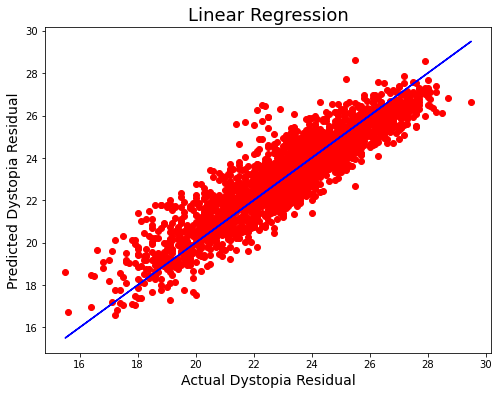

In [36]:

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Dystopia Residual',fontsize=14)
plt.ylabel('Predicted Dystopia Residual',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [38]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred1=dt.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.8217217010209515
Mean absolute error 0.8555755395683454
Mean Sqared error 1.3605305755395685


In [39]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred1=rf.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.8217217010209515
Mean absolute error 0.5801223021582732
Mean Sqared error 0.5811930809352517


In [40]:
sv=SVR()
sv.fit(x_train,y_train)
pred1=sv.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.8217217010209515
Mean absolute error 0.5860162399737056
Mean Sqared error 0.6202294603034527


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.7757436088704134


In [47]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.5802938044400957


In [48]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7753728438919307


In [49]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.5832409056261018


# Regularization

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [52]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
print(r2_score(y_test,pred_ls))

0.8217427389986696


In [53]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7761692064274429

# Ensemble Technique

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf1 =RandomForestRegressor()
gv = GridSearchCV(rf1,parameters)
gv.fit(x_train,y_train)

print(gv.best_params_)

In [54]:
rf1= RandomForestRegressor(criterion="mse",max_features="log2")
rf1.fit(x_train, y_train)
rf1.score(x_train, y_train)
pred_decision = rf1.predict(x_test)

rf1 = r2_score(y_test,pred_decision)
print('R2 Score:',rf1*100)

R2 Score: 90.63377191630754


# Modelling for Next_Tmax

In [55]:
for i in range(0,100):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    lr.fit(x1_train,y1_train)
    pred1_train=lr.predict(x1_train)
    pred1_test=lr.predict(x1_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y1_train,pred1_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y1_test,pred1_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.765057463504385
At random state 0,the testing accuracy is:- 0.7495540954050015


At random state 1,the training accuracy is:- 0.764262326822964
At random state 1,the testing accuracy is:- 0.7534352555365744


At random state 2,the training accuracy is:- 0.7614928403733751
At random state 2,the testing accuracy is:- 0.7648270946720339


At random state 3,the training accuracy is:- 0.7637664267553552
At random state 3,the testing accuracy is:- 0.7550297439993388


At random state 4,the training accuracy is:- 0.7656492720163363
At random state 4,the testing accuracy is:- 0.7464966755888078


At random state 5,the training accuracy is:- 0.7664939313284991
At random state 5,the testing accuracy is:- 0.7435429164073015


At random state 6,the training accuracy is:- 0.7606481106277123
At random state 6,the testing accuracy is:- 0.7672759692204921


At random state 7,the training accuracy is:- 0.7614056550318364
At random state 7,the testing accur

At random state 89,the testing accuracy is:- 0.7569665114456807


At random state 90,the training accuracy is:- 0.7629322179147577
At random state 90,the testing accuracy is:- 0.7582567620762031


At random state 91,the training accuracy is:- 0.7643233391703037
At random state 91,the testing accuracy is:- 0.7527755441764941


At random state 92,the training accuracy is:- 0.7592566655220225
At random state 92,the testing accuracy is:- 0.7738397732359901


At random state 93,the training accuracy is:- 0.7609445518220344
At random state 93,the testing accuracy is:- 0.7663353007013785


At random state 94,the training accuracy is:- 0.7621115846815275
At random state 94,the testing accuracy is:- 0.7611225859937003


At random state 95,the training accuracy is:- 0.7656390632355234
At random state 95,the testing accuracy is:- 0.7472671440462383


At random state 96,the training accuracy is:- 0.759558970785386
At random state 96,the testing accuracy is:- 0.7718248421877512


At random state 97

In [56]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.33,random_state=70)

In [57]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
lr.score(x1_train,y1_train)
pred1=lr.predict(x1_test)
print(r2_score(y1_test,pred1))
print('Mean absolute error',mean_absolute_error(y1_test,pred1))
print('Mean Sqared error',mean_squared_error(y1_test,pred1))

0.7633679682090155
Mean absolute error 1.0898704058507682
Mean Sqared error 2.063857426778361


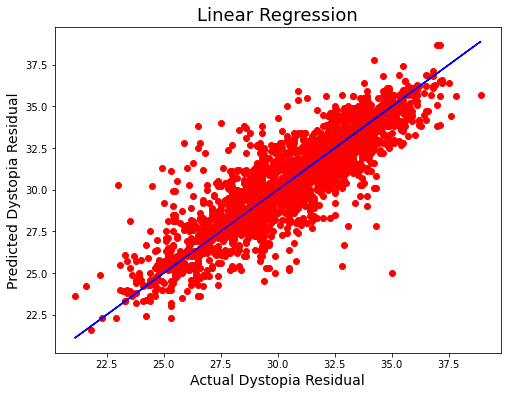

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x=y1_test,y=pred1, color='r')
plt.plot(y1_test,y1_test, color='b')
plt.xlabel('Actual Dystopia Residual',fontsize=14)
plt.ylabel('Predicted Dystopia Residual',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [61]:
dt=DecisionTreeRegressor()
dt.fit(x1_train,y1_train)
dt.score(x1_train,y1_train)
pred1=dt.predict(x1_test)
print(r2_score(y1_test,pred1))
print('Mean absolute error',mean_absolute_error(y1_test,pred1))
print('Mean Sqared error',mean_squared_error(y1_test,pred1))

0.7407606246033178
Mean absolute error 1.08363309352518
Mean Sqared error 2.261034172661871


In [62]:
rf=RandomForestRegressor()
rf.fit(x1_train,y1_train)
rf.score(x1_train,y1_train)
pred=rf.predict(x1_test)
print(r2_score(y1_test,pred))
print('Mean absolute error',mean_absolute_error(y1_test,pred))
print('Mean Sqared error',mean_squared_error(y1_test,pred))

0.8930321250257549
Mean absolute error 0.7274150179856116
Mean Sqared error 0.9329524896582742


In [63]:
sv=SVR()
sv.fit(x1_train,y1_train)
sv.score(x1_train,y1_train)
pred=sv.predict(x1_test)
print(r2_score(y1_test,pred))
print('Mean absolute error',mean_absolute_error(y1_test,pred))
print('Mean Sqared error',mean_squared_error(y1_test,pred))

0.8420949847347918
Mean absolute error 0.8394541066198644
Mean Sqared error 1.3772160768518016


In [66]:
print(cross_val_score(lr,x1,y1,cv=5).mean())

0.6884910208790902


In [67]:
print(cross_val_score(dt,x1,y1,cv=5).mean())

0.4077602477223394


In [68]:
print(cross_val_score(rf,x1,y1,cv=5).mean())

0.6702987208775191


In [69]:
print(cross_val_score(sv,x1,y1,cv=5).mean())

0.6504919475130511


# Regulization

In [70]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
gv = GridSearchCV(ls,parameters)
gv.fit(x1_train,y1_train)

print(gv.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [72]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(x1_train,y1_train)
ls.score(x1_train,y1_train)
pred_ls = ls.predict(x1_test)
print(r2_score(y1_test,pred_ls))

0.7634355957071584


# Ensemble

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf1 =RandomForestRegressor()
gv1= GridSearchCV(rf1,parameters)
gv1.fit(x_train,y_train)

print(gv1.best_params_)

In [73]:
rf2= RandomForestRegressor(criterion="mse",max_features="log2")
rf2.fit(x1_train, y1_train)
rf2.score(x1_train, y1_train)
pred_decision1 = rf2.predict(x1_test)

rf2 = r2_score(y1_test,pred_decision1)
print('R2 Score:',rf2*100)

R2 Score: 90.00960646596911


# Saving Model

In [76]:
import pickle
filename = 'Temparature_forecast_min.pkl'
pickle.dump(rf1, open(filename, 'wb'))

In [77]:
filename = 'Temparature_forecast_max.pkl'
pickle.dump(rf2, open(filename, 'wb'))